In [1]:
#I called the necessary libraries.
import cv2
import matplotlib.pyplot as plt
from PIL import Image, ImageChops
import numpy as np
import tifffile



In [2]:
#I used Normalized cross-correlation (NCC) to score how well the images match, 
#which is simply two is an dot product between the normalized vector: (image1./ || image1 || and image2./|| image2 ||).
#I have defined the NCC function that I will use here as well.
def ncc(a,b):
    a=a-a.mean(axis=0)
    b=b-b.mean(axis=0)
    return np.sum(((a/np.linalg.norm(a)) * (b/np.linalg.norm(b))))


In [3]:
#I called it up with openCV to review the first picture.
picture1 = cv2.imread("00087u.jpg")
cv2.imshow('image1',picture1)
cv2.waitKey(0)
cv2.destroyAllWindows()


[6, 5] [13, 7]
IMAGE FROM UNALIGNED PLATES


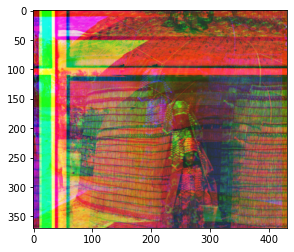

In [4]:
#As you can see, our picture consists of a combination of 3 plates. 
#In this section, I first divided the plate into 3 equal parts.
#Since I can't convert the image to array format with OpenCV, I called it back here in a different way.
imname='00087u.jpg'
img1=Image.open(imname)
img1=np.asarray(img1)
w,h=img1.shape
height=int(w/3)
blue1=img1[0:height,:]
green1=img1[height:2*height,:]
red1=img1[2*height:3*height,:]


#Since I will overlap the images without alignment, I have defined the method below. 
#If we examine it carefully, my method takes 3 variables.
def nccAlign(a, b, t):
    min_ncc = -1
    ivalue=np.linspace(-t,t,2*t,dtype=int)
    jvalue=np.linspace(-t,t,2*t,dtype=int)
    for i in ivalue:
        for j in jvalue:
            nccDiff = ncc(a,np.roll(b,[i,j],axis=(0,1)))
            if nccDiff > min_ncc:
                min_ncc = nccDiff
                output = [i,j]
    return output


#Here I overlapped the 3 plates I obtained in the order of BGR without aligning. 
#The image I got as a result was noisy and unclear.
alignGtoB = nccAlign(blue1,green1,20)
alignRtoB = nccAlign(blue1,red1,20)
print(alignGtoB, alignRtoB)
g=np.roll(green1,[alignGtoB[0]*10,alignGtoB[1]*10],axis=(0,1))
r=np.roll(red1,[alignRtoB[0]*10,alignRtoB[1]*10],axis=(0,1))
coloured = (np.dstack((r,g,blue1)))
coloured=coloured[int(coloured.shape[0]*0.05):int(coloured.shape[0]-coloured.shape[0]*0.05),int(coloured.shape[1]*0.05):int(coloured.shape[1]-coloured.shape[1]*0.05)]

#I gave the output of the image to the screen.
print("IMAGE FROM UNALIGNED PLATES")
tifffile.imsave('unaligned01.jpg', coloured)
plt.figure()
plt.imshow(coloured)


[6, 5]
[13, 7]
IMAGE FROM ALIGNED PLATES


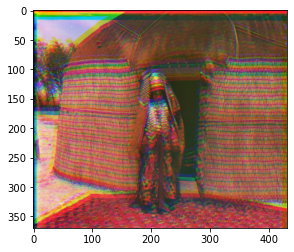

In [127]:
#This function is the one I will use to overlay the images I have aligned. 
#When examined carefully, it takes 5 variables, unlike the function I described above.
def nccAlign(a, b, x,y,t):
    min_ncc = -1
    ivalue=np.linspace(-t+x,t+x,2*t,dtype=int)
    jvalue=np.linspace(-t+y,t+y,2*t,dtype=int)
    for i in ivalue:
        for j in jvalue:
            nccDiff = ncc(a,np.roll(b,[i,j],axis=(0,1)))
            if nccDiff > min_ncc:
                min_ncc = nccDiff
                output = [i,j]
    print(output)
    return output

#I started the alignment process at this step. 
#Our plates were during BGR so I first aligned the G channel to the B channel. 
#Then I aligned the R channel to the B channel. 
#Then I overlapped the plates I aligned by calling the required function.
x_gtob,y_gtob=0,0
x_rtob,y_rtob=0,0
alignGtoB = nccAlign(blue1,green1,x_gtob,y_gtob,20)
alignRtoB = nccAlign(blue1,red1,x_rtob,y_rtob,20)
x_gtob,y_gtob=alignGtoB[0]*2,alignGtoB[1]*2
x_rtob,y_rtob=alignRtoB[0]*2,alignRtoB[1]*2
g=np.roll(green1,[x_gtob,y_gtob],axis=(0,1))
r=np.roll(red1,[x_rtob,y_rtob],axis=(0,1))
coloured = (np.dstack((r,g,blue1))).astype(np.uint8)
coloured=coloured[int(coloured.shape[0]*0.05):int(coloured.shape[0]-coloured.shape[0]*0.05),int(coloured.shape[1]*0.05):int(coloured.shape[1]-coloured.shape[1]*0.05)]
coloured = Image.fromarray(coloured)

#The screen output of the image I obtained is as follows. 
#The image I get from aligned plates is cleaner and less noisy than the image I get from unaligned plates.
print("IMAGE FROM ALIGNED PLATES")
tifffile.imsave('aligned01.jpg', coloured)
plt.figure()
plt.imshow(coloured)

In [128]:
#I called it up with openCV to review the second picture.
picture2 = cv2.imread("00088v.jpg")
cv2.imshow('image2',picture2)
cv2.waitKey(0)
cv2.destroyAllWindows()

[-2, 2] [4, 5]
IMAGE FROM UNALIGNED PLATES


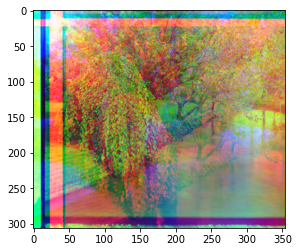

In [129]:
#As you can see, our picture consists of a combination of 3 plates. 
#In this section, I first divided the plate into 3 equal parts.
#Since I can't convert the image to array format with OpenCV, I called it back here in a different way.
imname='00088v.jpg'
img2=Image.open(imname)
img2=np.asarray(img2)
w,h=img2.shape
height=int(w/3)
blue2=img2[0:height,:]
green2=img2[height:2*height,:]
red2=img2[2*height:3*height,:]

#Since I will overlap the images without alignment, I have defined the method below. 
#If we examine it carefully, my method takes 3 variables.
def nccAlign(a, b, t):
    min_ncc = -1
    ivalue=np.linspace(-t,t,2*t,dtype=int)
    jvalue=np.linspace(-t,t,2*t,dtype=int)
    for i in ivalue:
        for j in jvalue:
            nccDiff = ncc(a,np.roll(b,[i,j],axis=(0,1)))
            if nccDiff > min_ncc:
                min_ncc = nccDiff
                output = [i,j]
    return output

#Here I overlapped the 3 plates I obtained in the order of BGR without aligning. 
#The image I got as a result was noisy and unclear.
alignGtoB = nccAlign(blue2,green2,20)
alignRtoB = nccAlign(blue2,red2,20)
print(alignGtoB, alignRtoB)
g=np.roll(green2,[alignGtoB[0]*10,alignGtoB[1]*10],axis=(0,1))
r=np.roll(red2,[alignRtoB[0]*10,alignRtoB[1]*10],axis=(0,1))
coloured = (np.dstack((r,g,blue2)))
coloured=coloured[int(coloured.shape[0]*0.05):int(coloured.shape[0]-coloured.shape[0]*0.05),int(coloured.shape[1]*0.05):int(coloured.shape[1]-coloured.shape[1]*0.05)]

#I gave the output of the image to the screen.
print("IMAGE FROM UNALIGNED PLATES")
tifffile.imsave('unaligned02.jpg', coloured)
plt.figure()
plt.imshow(coloured)


[-2, 2]
[4, 5]
IMAGE FROM ALIGNED PLATES


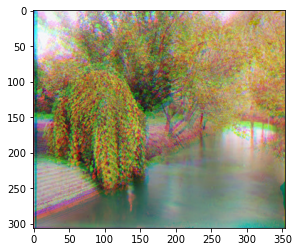

In [130]:
#This function is the one I will use to overlay the images I have aligned. 
#When examined carefully, it takes 5 variables, unlike the function I described above.
def nccAlign(a, b, x,y,t):
    min_ncc = -1
    ivalue=np.linspace(-t+x,t+x,2*t,dtype=int)
    jvalue=np.linspace(-t+y,t+y,2*t,dtype=int)
    for i in ivalue:
        for j in jvalue:
            nccDiff = ncc(a,np.roll(b,[i,j],axis=(0,1)))
            if nccDiff > min_ncc:
                min_ncc = nccDiff
                output = [i,j]
    print(output)
    return output

#I started the alignment process at this step. 
#Our plates were during BGR so I first aligned the G channel to the B channel. 
#Then I aligned the R channel to the B channel. 
#Then I overlapped the plates I aligned by calling the required function.
x_gtob,y_gtob=0,0
x_rtob,y_rtob=0,0
alignGtoB = nccAlign(blue2,green2,x_gtob,y_gtob,20)
alignRtoB = nccAlign(blue2,red2,x_rtob,y_rtob,20)
x_gtob,y_gtob=alignGtoB[0]*2,alignGtoB[1]*2
x_rtob,y_rtob=alignRtoB[0]*2,alignRtoB[1]*2
g=np.roll(green2,[x_gtob,y_gtob],axis=(0,1))
r=np.roll(red2,[x_rtob,y_rtob],axis=(0,1))
coloured = (np.dstack((r,g,blue2))).astype(np.uint8)
coloured=coloured[int(coloured.shape[0]*0.05):int(coloured.shape[0]-coloured.shape[0]*0.05),int(coloured.shape[1]*0.05):int(coloured.shape[1]-coloured.shape[1]*0.05)]
coloured = Image.fromarray(coloured)

#The screen output of the image I obtained is as follows. 
#The image I get from aligned plates is cleaner and less noisy than the image I get from unaligned plates.
print("IMAGE FROM ALIGNED PLATES")
tifffile.imsave('aligned02.jpg', coloured)
plt.figure()
plt.imshow(coloured)

In [131]:
#I called it up with openCV to review the third picture.
picture3 = cv2.imread("00106v.jpg")
cv2.imshow('image3',picture3)
cv2.waitKey(0)
cv2.destroyAllWindows()

[4, 1] [9, -1]
IMAGE FROM UNALIGNED PLATES


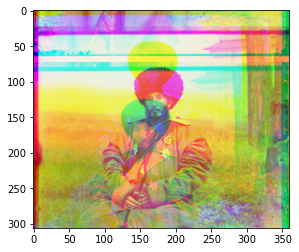

In [132]:
#As you can see, our picture consists of a combination of 3 plates. 
#In this section, I first divided the plate into 3 equal parts.
#Since I can't convert the image to array format with OpenCV, I called it back here in a different way.
imname='00106v.jpg'
img3=Image.open(imname)
img3=np.asarray(img3)
w,h=img3.shape
height=int(w/3)
blue3=img3[0:height,:]
green3=img3[height:2*height,:]
red3=img3[2*height:3*height,:]


#Since I will overlap the images without alignment, I have defined the method below. 
#If we examine it carefully, my method takes 3 variables.
def nccAlign(a, b, t):
    min_ncc = -1
    ivalue=np.linspace(-t,t,2*t,dtype=int)
    jvalue=np.linspace(-t,t,2*t,dtype=int)
    for i in ivalue:
        for j in jvalue:
            nccDiff = ncc(a,np.roll(b,[i,j],axis=(0,1)))
            if nccDiff > min_ncc:
                min_ncc = nccDiff
                output = [i,j]
    return output


#Here I overlapped the 3 plates I obtained in the order of BGR without aligning. 
#The image I got as a result was noisy and unclear.
alignGtoB = nccAlign(blue3,green3,20)
alignRtoB = nccAlign(blue3,red3,20)
print(alignGtoB, alignRtoB)
g=np.roll(green3,[alignGtoB[0]*10,alignGtoB[1]*10],axis=(0,1))
r=np.roll(red3,[alignRtoB[0]*10,alignRtoB[1]*10],axis=(0,1))
coloured = (np.dstack((r,g,blue3)))
coloured=coloured[int(coloured.shape[0]*0.05):int(coloured.shape[0]-coloured.shape[0]*0.05),int(coloured.shape[1]*0.05):int(coloured.shape[1]-coloured.shape[1]*0.05)]

#I gave the output of the image to the screen.
print("IMAGE FROM UNALIGNED PLATES")
tifffile.imsave('unaligned03.jpg', coloured)
plt.figure()
plt.imshow(coloured)


[4, 1]
[9, -1]
IMAGE FROM ALIGNED PLATES


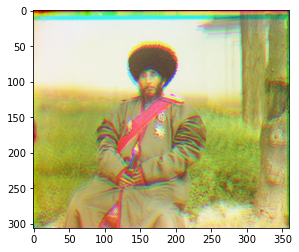

In [133]:
#This function is the one I will use to overlay the images I have aligned. 
#When examined carefully, it takes 5 variables, unlike the function I described above.
def nccAlign(a, b, x,y,t):
    min_ncc = -1
    ivalue=np.linspace(-t+x,t+x,2*t,dtype=int)
    jvalue=np.linspace(-t+y,t+y,2*t,dtype=int)
    for i in ivalue:
        for j in jvalue:
            nccDiff = ncc(a,np.roll(b,[i,j],axis=(0,1)))
            if nccDiff > min_ncc:
                min_ncc = nccDiff
                output = [i,j]
    print(output)
    return output

#I started the alignment process at this step. 
#Our plates were during BGR so I first aligned the G channel to the B channel. 
#Then I aligned the R channel to the B channel. 
#Then I overlapped the plates I aligned by calling the required function.
x_gtob,y_gtob=0,0
x_rtob,y_rtob=0,0
alignGtoB = nccAlign(blue3,green3,x_gtob,y_gtob,20)
alignRtoB = nccAlign(blue3,red3,x_rtob,y_rtob,20)
x_gtob,y_gtob=alignGtoB[0]*2,alignGtoB[1]*2
x_rtob,y_rtob=alignRtoB[0]*2,alignRtoB[1]*2
g=np.roll(green3,[x_gtob,y_gtob],axis=(0,1))
r=np.roll(red3,[x_rtob,y_rtob],axis=(0,1))
coloured = (np.dstack((r,g,blue3))).astype(np.uint8)
coloured=coloured[int(coloured.shape[0]*0.05):int(coloured.shape[0]-coloured.shape[0]*0.05),int(coloured.shape[1]*0.05):int(coloured.shape[1]-coloured.shape[1]*0.05)]
coloured = Image.fromarray(coloured)

#The screen output of the image I obtained is as follows. 
#The image I get from aligned plates is cleaner and less noisy than the image I get from unaligned plates.
print("IMAGE FROM ALIGNED PLATES")
tifffile.imsave('aligned03.jpg', coloured)
plt.figure()
plt.imshow(coloured)

In [134]:
#I called it up with openCV to review the fourth picture.
picture4 = cv2.imread("00128u.jpg")
cv2.imshow('image4',picture4)
cv2.waitKey(0)
cv2.destroyAllWindows()

[4, 3] [10, 5]
IMAGE FROM UNALIGNED PLATES


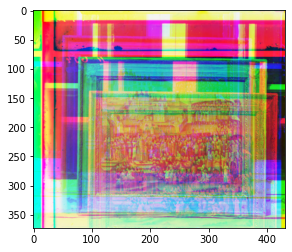

In [135]:
#As you can see, our picture consists of a combination of 3 plates. 
#In this section, I first divided the plate into 3 equal parts.
#Since I can't convert the image to array format with OpenCV, I called it back here in a different way.
imname='00128u.jpg'
img4=Image.open(imname)
img4=np.asarray(img4)
w,h=img4.shape
height=int(w/3)
blue4=img4[0:height,:]
green4=img4[height:2*height,:]
red4=img4[2*height:3*height,:]


#Since I will overlap the images without alignment, I have defined the method below. 
#If we examine it carefully, my method takes 3 variables.
def nccAlign(a, b, t):
    min_ncc = -1
    ivalue=np.linspace(-t,t,2*t,dtype=int)
    jvalue=np.linspace(-t,t,2*t,dtype=int)
    for i in ivalue:
        for j in jvalue:
            nccDiff = ncc(a,np.roll(b,[i,j],axis=(0,1)))
            if nccDiff > min_ncc:
                min_ncc = nccDiff
                output = [i,j]
    return output


#Here I overlapped the 3 plates I obtained in the order of BGR without aligning. 
#The image I got as a result was noisy and unclear.
alignGtoB = nccAlign(blue4,green4,20)
alignRtoB = nccAlign(blue4,red4,20)
print(alignGtoB, alignRtoB)
g=np.roll(green4,[alignGtoB[0]*10,alignGtoB[1]*10],axis=(0,1))
r=np.roll(red4,[alignRtoB[0]*10,alignRtoB[1]*10],axis=(0,1))
coloured = (np.dstack((r,g,blue4)))
coloured=coloured[int(coloured.shape[0]*0.05):int(coloured.shape[0]-coloured.shape[0]*0.05),int(coloured.shape[1]*0.05):int(coloured.shape[1]-coloured.shape[1]*0.05)]

#I gave the output of the image to the screen.
print("IMAGE FROM UNALIGNED PLATES")
tifffile.imsave('unaligned04.jpg', coloured)
plt.figure()
plt.imshow(coloured)

[4, 3]
[10, 5]
IMAGE FROM ALIGNED PLATES


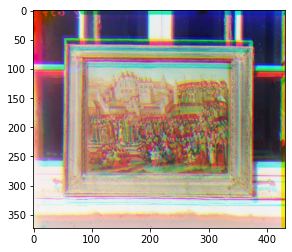

In [136]:
#This function is the one I will use to overlay the images I have aligned. 
#When examined carefully, it takes 5 variables, unlike the function I described above.
def nccAlign(a, b, x,y,t):
    min_ncc = -1
    ivalue=np.linspace(-t+x,t+x,2*t,dtype=int)
    jvalue=np.linspace(-t+y,t+y,2*t,dtype=int)
    for i in ivalue:
        for j in jvalue:
            nccDiff = ncc(a,np.roll(b,[i,j],axis=(0,1)))
            if nccDiff > min_ncc:
                min_ncc = nccDiff
                output = [i,j]
    print(output)
    return output

#I started the alignment process at this step. 
#Our plates were during BGR so I first aligned the G channel to the B channel. 
#Then I aligned the R channel to the B channel. 
#Then I overlapped the plates I aligned by calling the required function.
x_gtob,y_gtob=0,0
x_rtob,y_rtob=0,0
alignGtoB = nccAlign(blue4,green4,x_gtob,y_gtob,20)
alignRtoB = nccAlign(blue4,red4,x_rtob,y_rtob,20)
x_gtob,y_gtob=alignGtoB[0]*2,alignGtoB[1]*2
x_rtob,y_rtob=alignRtoB[0]*2,alignRtoB[1]*2
g=np.roll(green4,[x_gtob,y_gtob],axis=(0,1))
r=np.roll(red4,[x_rtob,y_rtob],axis=(0,1))
coloured = (np.dstack((r,g,blue4))).astype(np.uint8)
coloured=coloured[int(coloured.shape[0]*0.05):int(coloured.shape[0]-coloured.shape[0]*0.05),int(coloured.shape[1]*0.05):int(coloured.shape[1]-coloured.shape[1]*0.05)]
coloured = Image.fromarray(coloured)

#The screen output of the image I obtained is as follows. 
#The image I get from aligned plates is cleaner and less noisy than the image I get from unaligned plates.
print("IMAGE FROM ALIGNED PLATES")
tifffile.imsave('aligned04.jpg', coloured)
plt.figure()
plt.imshow(coloured)

In [137]:
#I called it up with openCV to review the fifth picture.
picture5 = cv2.imread("01031v.jpg")
cv2.imshow('image5',picture5)
cv2.waitKey(0)
cv2.destroyAllWindows()

[1, 1] [4, 2]
IMAGE FROM UNALIGNED PLATES


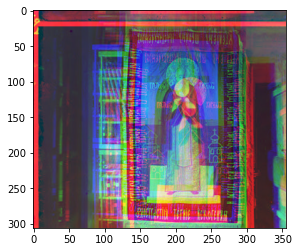

In [138]:
#As you can see, our picture consists of a combination of 3 plates. 
#In this section, I first divided the plate into 3 equal parts.
#Since I can't convert the image to array format with OpenCV, I called it back here in a different way.
imname='01031v.jpg'
img5=Image.open(imname)
img5=np.asarray(img5)
w,h=img5.shape
height=int(w/3)
blue5=img5[0:height,:]
green5=img5[height:2*height,:]
red5=img5[2*height:3*height,:]


#Since I will overlap the images without alignment, I have defined the method below. 
#If we examine it carefully, my method takes 3 variables.
def nccAlign(a, b, t):
    min_ncc = -1
    ivalue=np.linspace(-t,t,2*t,dtype=int)
    jvalue=np.linspace(-t,t,2*t,dtype=int)
    for i in ivalue:
        for j in jvalue:
            nccDiff = ncc(a,np.roll(b,[i,j],axis=(0,1)))
            if nccDiff > min_ncc:
                min_ncc = nccDiff
                output = [i,j]
    return output


#Here I overlapped the 3 plates I obtained in the order of BGR without aligning. 
#The image I got as a result was noisy and unclear.
alignGtoB = nccAlign(blue5,green5,20)
alignRtoB = nccAlign(blue5,red5,20)
print(alignGtoB, alignRtoB)
g=np.roll(green5,[alignGtoB[0]*10,alignGtoB[1]*10],axis=(0,1))
r=np.roll(red5,[alignRtoB[0]*10,alignRtoB[1]*10],axis=(0,1))
coloured = (np.dstack((r,g,blue5)))
coloured=coloured[int(coloured.shape[0]*0.05):int(coloured.shape[0]-coloured.shape[0]*0.05),int(coloured.shape[1]*0.05):int(coloured.shape[1]-coloured.shape[1]*0.05)]

#I gave the output of the image to the screen.
print("IMAGE FROM UNALIGNED PLATES")
tifffile.imsave('unaligned05.jpg', coloured)
plt.figure()
plt.imshow(coloured)

[1, 1]
[4, 2]
IMAGE FROM ALIGNED PLATES


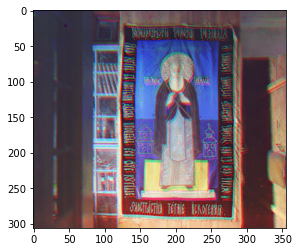

In [139]:
#This function is the one I will use to overlay the images I have aligned. 
#When examined carefully, it takes 5 variables, unlike the function I described above.
def nccAlign(a, b, x,y,t):
    min_ncc = -1
    ivalue=np.linspace(-t+x,t+x,2*t,dtype=int)
    jvalue=np.linspace(-t+y,t+y,2*t,dtype=int)
    for i in ivalue:
        for j in jvalue:
            nccDiff = ncc(a,np.roll(b,[i,j],axis=(0,1)))
            if nccDiff > min_ncc:
                min_ncc = nccDiff
                output = [i,j]
    print(output)
    return output

#I started the alignment process at this step. 
#Our plates were during BGR so I first aligned the G channel to the B channel. 
#Then I aligned the R channel to the B channel. 
#Then I overlapped the plates I aligned by calling the required function.
x_gtob,y_gtob=0,0
x_rtob,y_rtob=0,0
alignGtoB = nccAlign(blue5,green5,x_gtob,y_gtob,20)
alignRtoB = nccAlign(blue5,red5,x_rtob,y_rtob,20)
x_gtob,y_gtob=alignGtoB[0]*2,alignGtoB[1]*2
x_rtob,y_rtob=alignRtoB[0]*2,alignRtoB[1]*2
g=np.roll(green5,[x_gtob,y_gtob],axis=(0,1))
r=np.roll(red5,[x_rtob,y_rtob],axis=(0,1))
coloured = (np.dstack((r,g,blue5))).astype(np.uint8)
coloured=coloured[int(coloured.shape[0]*0.05):int(coloured.shape[0]-coloured.shape[0]*0.05),int(coloured.shape[1]*0.05):int(coloured.shape[1]-coloured.shape[1]*0.05)]
coloured = Image.fromarray(coloured)

#The screen output of the image I obtained is as follows. 
#The image I get from aligned plates is cleaner and less noisy than the image I get from unaligned plates.
print("IMAGE FROM ALIGNED PLATES")
tifffile.imsave('aligned05.jpg', coloured)
plt.figure()
plt.imshow(coloured)

In [140]:
#I called it up with openCV to review the sixth picture.
picture6 = cv2.imread("00351v.jpg")
cv2.imshow('image6',picture6)
cv2.waitKey(0)
cv2.destroyAllWindows()

[4, 0] [13, 1]
IMAGE FROM UNALIGNED PLATES


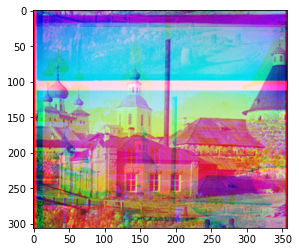

In [141]:
#As you can see, our picture consists of a combination of 3 plates. 
#In this section, I first divided the plate into 3 equal parts.
#Since I can't convert the image to array format with OpenCV, I called it back here in a different way.
imname='00351v.jpg'
img6=Image.open(imname)
img6=np.asarray(img6)
w,h=img6.shape
height=int(w/3)
blue6=img6[0:height,:]
green6=img6[height:2*height,:]
red6=img6[2*height:3*height,:]


#Since I will overlap the images without alignment, I have defined the method below. 
#If we examine it carefully, my method takes 3 variables.
def nccAlign(a, b, t):
    min_ncc = -1
    ivalue=np.linspace(-t,t,2*t,dtype=int)
    jvalue=np.linspace(-t,t,2*t,dtype=int)
    for i in ivalue:
        for j in jvalue:
            nccDiff = ncc(a,np.roll(b,[i,j],axis=(0,1)))
            if nccDiff > min_ncc:
                min_ncc = nccDiff
                output = [i,j]
    return output


#Here I overlapped the 3 plates I obtained in the order of BGR without aligning. 
#The image I got as a result was noisy and unclear.
alignGtoB = nccAlign(blue6,green6,20)
alignRtoB = nccAlign(blue6,red6,20)
print(alignGtoB, alignRtoB)
g=np.roll(green6,[alignGtoB[0]*10,alignGtoB[1]*10],axis=(0,1))
r=np.roll(red6,[alignRtoB[0]*10,alignRtoB[1]*10],axis=(0,1))
coloured = (np.dstack((r,g,blue6)))
coloured=coloured[int(coloured.shape[0]*0.05):int(coloured.shape[0]-coloured.shape[0]*0.05),int(coloured.shape[1]*0.05):int(coloured.shape[1]-coloured.shape[1]*0.05)]

#I gave the output of the image to the screen.
print("IMAGE FROM UNALIGNED PLATES")
tifffile.imsave('unaligned06.jpg', coloured)
plt.figure()
plt.imshow(coloured)

[4, 0]
[13, 1]
IMAGE FROM ALIGNED PLATES


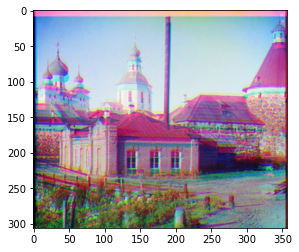

In [142]:
#This function is the one I will use to overlay the images I have aligned. 
#When examined carefully, it takes 5 variables, unlike the function I described above.
def nccAlign(a, b, x,y,t):
    min_ncc = -1
    ivalue=np.linspace(-t+x,t+x,2*t,dtype=int)
    jvalue=np.linspace(-t+y,t+y,2*t,dtype=int)
    for i in ivalue:
        for j in jvalue:
            nccDiff = ncc(a,np.roll(b,[i,j],axis=(0,1)))
            if nccDiff > min_ncc:
                min_ncc = nccDiff
                output = [i,j]
    print(output)
    return output

#I started the alignment process at this step. 
#Our plates were during BGR so I first aligned the G channel to the B channel. 
#Then I aligned the R channel to the B channel. 
#Then I overlapped the plates I aligned by calling the required function.
x_gtob,y_gtob=0,0
x_rtob,y_rtob=0,0
alignGtoB = nccAlign(blue6,green6,x_gtob,y_gtob,20)
alignRtoB = nccAlign(blue6,red6,x_rtob,y_rtob,20)
x_gtob,y_gtob=alignGtoB[0]*2,alignGtoB[1]*2
x_rtob,y_rtob=alignRtoB[0]*2,alignRtoB[1]*2
g=np.roll(green6,[x_gtob,y_gtob],axis=(0,1))
r=np.roll(red6,[x_rtob,y_rtob],axis=(0,1))
coloured = (np.dstack((r,g,blue6))).astype(np.uint8)
coloured=coloured[int(coloured.shape[0]*0.05):int(coloured.shape[0]-coloured.shape[0]*0.05),int(coloured.shape[1]*0.05):int(coloured.shape[1]-coloured.shape[1]*0.05)]
coloured = Image.fromarray(coloured)

#The screen output of the image I obtained is as follows. 
#The image I get from aligned plates is cleaner and less noisy than the image I get from unaligned plates.
print("IMAGE FROM ALIGNED PLATES")
tifffile.imsave('aligned07.jpg', coloured)
plt.figure()
plt.imshow(coloured)

In [143]:
#I called it up with openCV to review the seventh picture.
picture7 = cv2.imread("01043u.jpg")
cv2.imshow('image7',picture7)
cv2.waitKey(0)
cv2.destroyAllWindows()

[-2, 1] [2, 2]
IMAGE FROM UNALIGNED PLATES


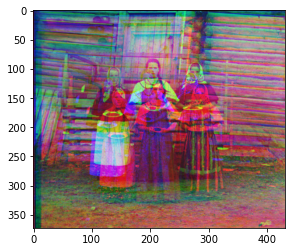

In [144]:
#As you can see, our picture consists of a combination of 3 plates. 
#In this section, I first divided the plate into 3 equal parts.
#Since I can't convert the image to array format with OpenCV, I called it back here in a different way.
imname='01043u.jpg'
img7=Image.open(imname)
img7=np.asarray(img7)
w,h=img7.shape
height=int(w/3)
blue7=img7[0:height,:]
green7=img7[height:2*height,:]
red7=img7[2*height:3*height,:]


#Since I will overlap the images without alignment, I have defined the method below. 
#If we examine it carefully, my method takes 3 variables.
def nccAlign(a, b, t):
    min_ncc = -1
    ivalue=np.linspace(-t,t,2*t,dtype=int)
    jvalue=np.linspace(-t,t,2*t,dtype=int)
    for i in ivalue:
        for j in jvalue:
            nccDiff = ncc(a,np.roll(b,[i,j],axis=(0,1)))
            if nccDiff > min_ncc:
                min_ncc = nccDiff
                output = [i,j]
    return output


#Here I overlapped the 3 plates I obtained in the order of BGR without aligning. 
#The image I got as a result was noisy and unclear.
alignGtoB = nccAlign(blue7,green7,20)
alignRtoB = nccAlign(blue7,red7,20)
print(alignGtoB, alignRtoB)
g=np.roll(green7,[alignGtoB[0]*10,alignGtoB[1]*10],axis=(0,1))
r=np.roll(red7,[alignRtoB[0]*10,alignRtoB[1]*10],axis=(0,1))
coloured = (np.dstack((r,g,blue7)))
coloured=coloured[int(coloured.shape[0]*0.05):int(coloured.shape[0]-coloured.shape[0]*0.05),int(coloured.shape[1]*0.05):int(coloured.shape[1]-coloured.shape[1]*0.05)]

#I gave the output of the image to the screen.
print("IMAGE FROM UNALIGNED PLATES")
tifffile.imsave('unaligned07.jpg', coloured)
plt.figure()
plt.imshow(coloured)

[-2, 1]
[2, 2]
IMAGE FROM ALIGNED PLATES


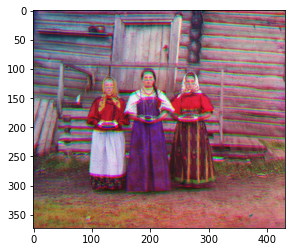

In [145]:
#This function is the one I will use to overlay the images I have aligned. 
#When examined carefully, it takes 5 variables, unlike the function I described above.
def nccAlign(a, b, x,y,t):
    min_ncc = -1
    ivalue=np.linspace(-t+x,t+x,2*t,dtype=int)
    jvalue=np.linspace(-t+y,t+y,2*t,dtype=int)
    for i in ivalue:
        for j in jvalue:
            nccDiff = ncc(a,np.roll(b,[i,j],axis=(0,1)))
            if nccDiff > min_ncc:
                min_ncc = nccDiff
                output = [i,j]
    print(output)
    return output

#I started the alignment process at this step. 
#Our plates were during BGR so I first aligned the G channel to the B channel. 
#Then I aligned the R channel to the B channel. 
#Then I overlapped the plates I aligned by calling the required function.
x_gtob,y_gtob=0,0
x_rtob,y_rtob=0,0
alignGtoB = nccAlign(blue7,green7,x_gtob,y_gtob,20)
alignRtoB = nccAlign(blue7,red7,x_rtob,y_rtob,20)
x_gtob,y_gtob=alignGtoB[0]*2,alignGtoB[1]*2
x_rtob,y_rtob=alignRtoB[0]*2,alignRtoB[1]*2
g=np.roll(green7,[x_gtob,y_gtob],axis=(0,1))
r=np.roll(red7,[x_rtob,y_rtob],axis=(0,1))
coloured = (np.dstack((r,g,blue7))).astype(np.uint8)
coloured=coloured[int(coloured.shape[0]*0.05):int(coloured.shape[0]-coloured.shape[0]*0.05),int(coloured.shape[1]*0.05):int(coloured.shape[1]-coloured.shape[1]*0.05)]
coloured = Image.fromarray(coloured)

#The screen output of the image I obtained is as follows. 
#The image I get from aligned plates is cleaner and less noisy than the image I get from unaligned plates.
print("IMAGE FROM ALIGNED PLATES")
tifffile.imsave('aligned07.jpg', coloured)
plt.figure()
plt.imshow(coloured)

In [146]:
#I called it up with openCV to review the eighth picture.
picture8 = cv2.imread("01734u.jpg")
cv2.imshow('image8',picture8)
cv2.waitKey(0)
cv2.destroyAllWindows()

[1, 4] [11, 6]
IMAGE FROM UNALIGNED PLATES


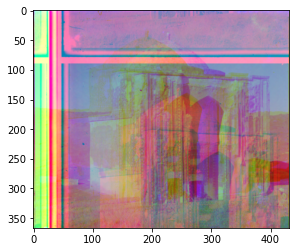

In [147]:
#As you can see, our picture consists of a combination of 3 plates. 
#In this section, I first divided the plate into 3 equal parts.
#Since I can't convert the image to array format with OpenCV, I called it back here in a different way.
imname='01734u.jpg'
img8=Image.open(imname)
img8=np.asarray(img8)
w,h=img8.shape
height=int(w/3)
blue8=img8[0:height,:]
green8=img8[height:2*height,:]
red8=img8[2*height:3*height,:]


#Since I will overlap the images without alignment, I have defined the method below. 
#If we examine it carefully, my method takes 3 variables.
def nccAlign(a, b, t):
    min_ncc = -1
    ivalue=np.linspace(-t,t,2*t,dtype=int)
    jvalue=np.linspace(-t,t,2*t,dtype=int)
    for i in ivalue:
        for j in jvalue:
            nccDiff = ncc(a,np.roll(b,[i,j],axis=(0,1)))
            if nccDiff > min_ncc:
                min_ncc = nccDiff
                output = [i,j]
    return output


#Here I overlapped the 3 plates I obtained in the order of BGR without aligning. 
#The image I got as a result was noisy and unclear.
alignGtoB = nccAlign(blue8,green8,20)
alignRtoB = nccAlign(blue8,red8,20)
print(alignGtoB, alignRtoB)
g=np.roll(green8,[alignGtoB[0]*10,alignGtoB[1]*10],axis=(0,1))
r=np.roll(red8,[alignRtoB[0]*10,alignRtoB[1]*10],axis=(0,1))
coloured = (np.dstack((r,g,blue8)))
coloured=coloured[int(coloured.shape[0]*0.05):int(coloured.shape[0]-coloured.shape[0]*0.05),int(coloured.shape[1]*0.05):int(coloured.shape[1]-coloured.shape[1]*0.05)]

#I gave the output of the image to the screen.
print("IMAGE FROM UNALIGNED PLATES")
tifffile.imsave('unaligned08.jpg', coloured)
plt.figure()
plt.imshow(coloured)

[1, 4]
[11, 6]
IMAGE FROM ALIGNED PLATES


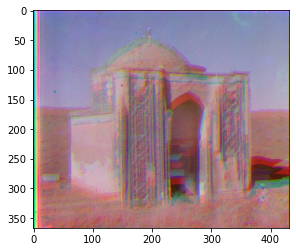

In [148]:
#This function is the one I will use to overlay the images I have aligned. 
#When examined carefully, it takes 5 variables, unlike the function I described above.
def nccAlign(a, b, x,y,t):
    min_ncc = -1
    ivalue=np.linspace(-t+x,t+x,2*t,dtype=int)
    jvalue=np.linspace(-t+y,t+y,2*t,dtype=int)
    for i in ivalue:
        for j in jvalue:
            nccDiff = ncc(a,np.roll(b,[i,j],axis=(0,1)))
            if nccDiff > min_ncc:
                min_ncc = nccDiff
                output = [i,j]
    print(output)
    return output

#I started the alignment process at this step. 
#Our plates were during BGR so I first aligned the G channel to the B channel. 
#Then I aligned the R channel to the B channel. 
#Then I overlapped the plates I aligned by calling the required function.
x_gtob,y_gtob=0,0
x_rtob,y_rtob=0,0
alignGtoB = nccAlign(blue8,green8,x_gtob,y_gtob,20)
alignRtoB = nccAlign(blue8,red8,x_rtob,y_rtob,20)
x_gtob,y_gtob=alignGtoB[0]*2,alignGtoB[1]*2
x_rtob,y_rtob=alignRtoB[0]*2,alignRtoB[1]*2
g=np.roll(green8,[x_gtob,y_gtob],axis=(0,1))
r=np.roll(red8,[x_rtob,y_rtob],axis=(0,1))
coloured = (np.dstack((r,g,blue8))).astype(np.uint8)
coloured=coloured[int(coloured.shape[0]*0.05):int(coloured.shape[0]-coloured.shape[0]*0.05),int(coloured.shape[1]*0.05):int(coloured.shape[1]-coloured.shape[1]*0.05)]
coloured = Image.fromarray(coloured)

#The screen output of the image I obtained is as follows. 
#The image I get from aligned plates is cleaner and less noisy than the image I get from unaligned plates.
print("IMAGE FROM ALIGNED PLATES")
tifffile.imsave('aligned08.jpg', coloured)
plt.figure()
plt.imshow(coloured)